<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

<b>Цель:</b> Подготовить модель машинного обучения, которая будет определять концентрацию золота после технологического процесса по очистке золосодержащей руды, используя данные с характеристиками добычи и промежуточными этапами очистки. Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

<b>Технологический процесс состоит из нескольких этапов:</b>
1. Флотация
Во флотационную установку подаётся смесь золотосодержащей руды. После обогащения получается черновой концентрат и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов.
На стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости).
2. Очистка 
Черновой концентрат проходит две очистки. На выходе получается финальный концентрат и новые отвальные хвосты.

<b>Необходимо:</b>

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.dummy import DummyRegressor





In [2]:
data_train = pd.read_csv('https://code.s3.yandex.net/datasets/gold_industry_train.csv')
data_test = pd.read_csv('https://code.s3.yandex.net/datasets/gold_industry_test.csv')
data_full = pd.read_csv('https://code.s3.yandex.net/datasets/gold_industry_full.csv')

In [3]:
data_train.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


In [4]:
data_test.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805


In [5]:
data_full.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


In [6]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


In [8]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

<b>1.1 Проверка на дубликаты</b>

In [9]:
table_1_data = {'Колиство явных дубликатов':[data_train.duplicated().sum(),data_test.duplicated().sum(),data_full.duplicated().sum()]}
table_1 = pd.DataFrame(table_1_data, index=['train','test','full'])
table_1

,Колиство явных дубликатов
train,0
test,0
full,0


<b>Вывод:</b>  Явные дубликаты в выборках отсутствуют

<b>1.2 Изменение типов данных</b>

In [10]:
for i in [data_full, data_train, data_test]:
    types = i.dtypes['date']
    display(types)

dtype('O')

dtype('O')

dtype('O')

In [11]:
data_full['date'] = pd.to_datetime(data_full['date'], format='%Y-%m-%d %H:%M:%S')
data_train['date'] = pd.to_datetime(data_train['date'], format='%Y-%m-%d %H:%M:%S')
data_test['date'] = pd.to_datetime(data_test['date'], format='%Y-%m-%d %H:%M:%S')

<b>Вывод</b> Необходимо было изменить тип данных столбца 'date' во всех выборках на datetime, т.к во всех выборках данный столбец имеет тип данных 'object'

<b>1.3 Работа с пропусками</b>

In [12]:
pd.DataFrame(data_full.isna().sum()/len(data_full)).sort_values(by=0, ascending=False)

,0
secondary_cleaner.output.tail_sol,0.089922
rougher.input.floatbank11_xanthate,0.023304
rougher.state.floatbank10_e_air,0.022429
primary_cleaner.output.concentrate_sol,0.019034
secondary_cleaner.state.floatbank2_a_air,0.011317
...,...
rougher.output.tail_sol,0.000000
primary_cleaner.input.feed_size,0.000000
rougher.input.feed_au,0.000000
primary_cleaner.output.concentrate_au,0.000000


In [13]:
pd.DataFrame(data_test.isna().sum()/len(data_full)).sort_values(by=0, ascending=False)

,0
secondary_cleaner.state.floatbank2_a_air,0.006482
rougher.input.floatbank11_xanthate,0.002366
rougher.input.feed_size,0.002263
primary_cleaner.input.xanthate,0.002212
rougher.input.feed_pb,0.001440
rougher.input.feed_sol,0.001132
primary_cleaner.input.depressant,0.000463
rougher.input.floatbank11_sulfate,0.000412
rougher.state.floatbank10_e_air,0.000360
rougher.input.feed_rate,0.000206


In [14]:
pd.DataFrame(data_train.isna().sum()/len(data_full)).sort_values(by=0, ascending=False)

,0
secondary_cleaner.output.tail_sol,0.047328
rougher.state.floatbank10_e_air,0.022069
rougher.input.floatbank11_xanthate,0.020937
primary_cleaner.output.concentrate_sol,0.013632
final.output.concentrate_sol,0.009877
...,...
primary_cleaner.state.floatbank8_c_air,0.000000
primary_cleaner.state.floatbank8_c_level,0.000000
primary_cleaner.state.floatbank8_d_level,0.000000
primary_cleaner.output.concentrate_au,0.000000


In [15]:
data_full = data_full.ffill(axis=0)
data_train = data_train.ffill(axis=0)
data_test = data_test.ffill(axis=0)

<b>Вывод</b> В выборках присутствуют пропуски. Максимальное количетсво пропусков в обучающей выборке и полной содержит признак secondary_cleaner.output.tail_sol и составляет 8%,однако данный признак не присутствует в тестовой. Доля пропусков в остальных признаках незначительна. Так как Данные индексируются датой и временем получения информации (признак date), соседние по времени параметры часто похожи, пропуски в данных можно заполнить данными из предыдущих строк

Проверим, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.

In [16]:
c = data_train['rougher.output.concentrate_au']
f = data_train['rougher.input.feed_au']
t = data_train['rougher.output.tail_au']
display('Средняя оабсолютная ошибка:', mean_absolute_error(data_train['rougher.output.recovery'],
                                                          (c*(f-t))/(f*(c-t))*100))

'Средняя оабсолютная ошибка:'

9.83758577644259e-15

<b>Вывод</b> Средняя абсолютная ошибка близка к 0, следовательно Эффективность обогащения расчитана верно

Определим признаки, которые недоступны в тестовый выборке

In [17]:
none_columns = set(data_train) - set(data_test)

In [18]:
parametr = 0
calculation = 0
for i in none_columns:
    if 'output' in i:
        parametr += 1
    else:
        calculation += 1 

display('Параметры продукта', parametr)
display('Расчётные характеристики', calculation)

'Параметры продукта'

30

'Расчётные характеристики'

4

<b>Вывод:</b> В большей мере отсутствуют параметры продукты, в меньшей расчётные характеристики

В тестовой выборке отсутствуют целевые признаки 'rougher.output.recovery','final.output.recovery'. Необходимо добавить этизначения из полной выборки

In [19]:
data_test = data_test.merge(data_full.loc[:,['date','rougher.output.recovery','final.output.recovery']], on='date')

In [20]:
data_test.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575,89.514960,70.281454
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471,89.858126,65.523246
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155,91.816623,74.817644
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973,88.478959,63.082720
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805,89.230316,74.463380


<b>Выводы:</b> 
<br>Эффективность обогащения расчитана правильно.
<br>Дубликатов не найдено
<br>Заполнены пропуски в данных
<br>Добавлены целевые признаки в тестовую выборку
<br>Изменён тип данных в столбце "date"

## Анализ данных

<b>2.1 Изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки.</b> 

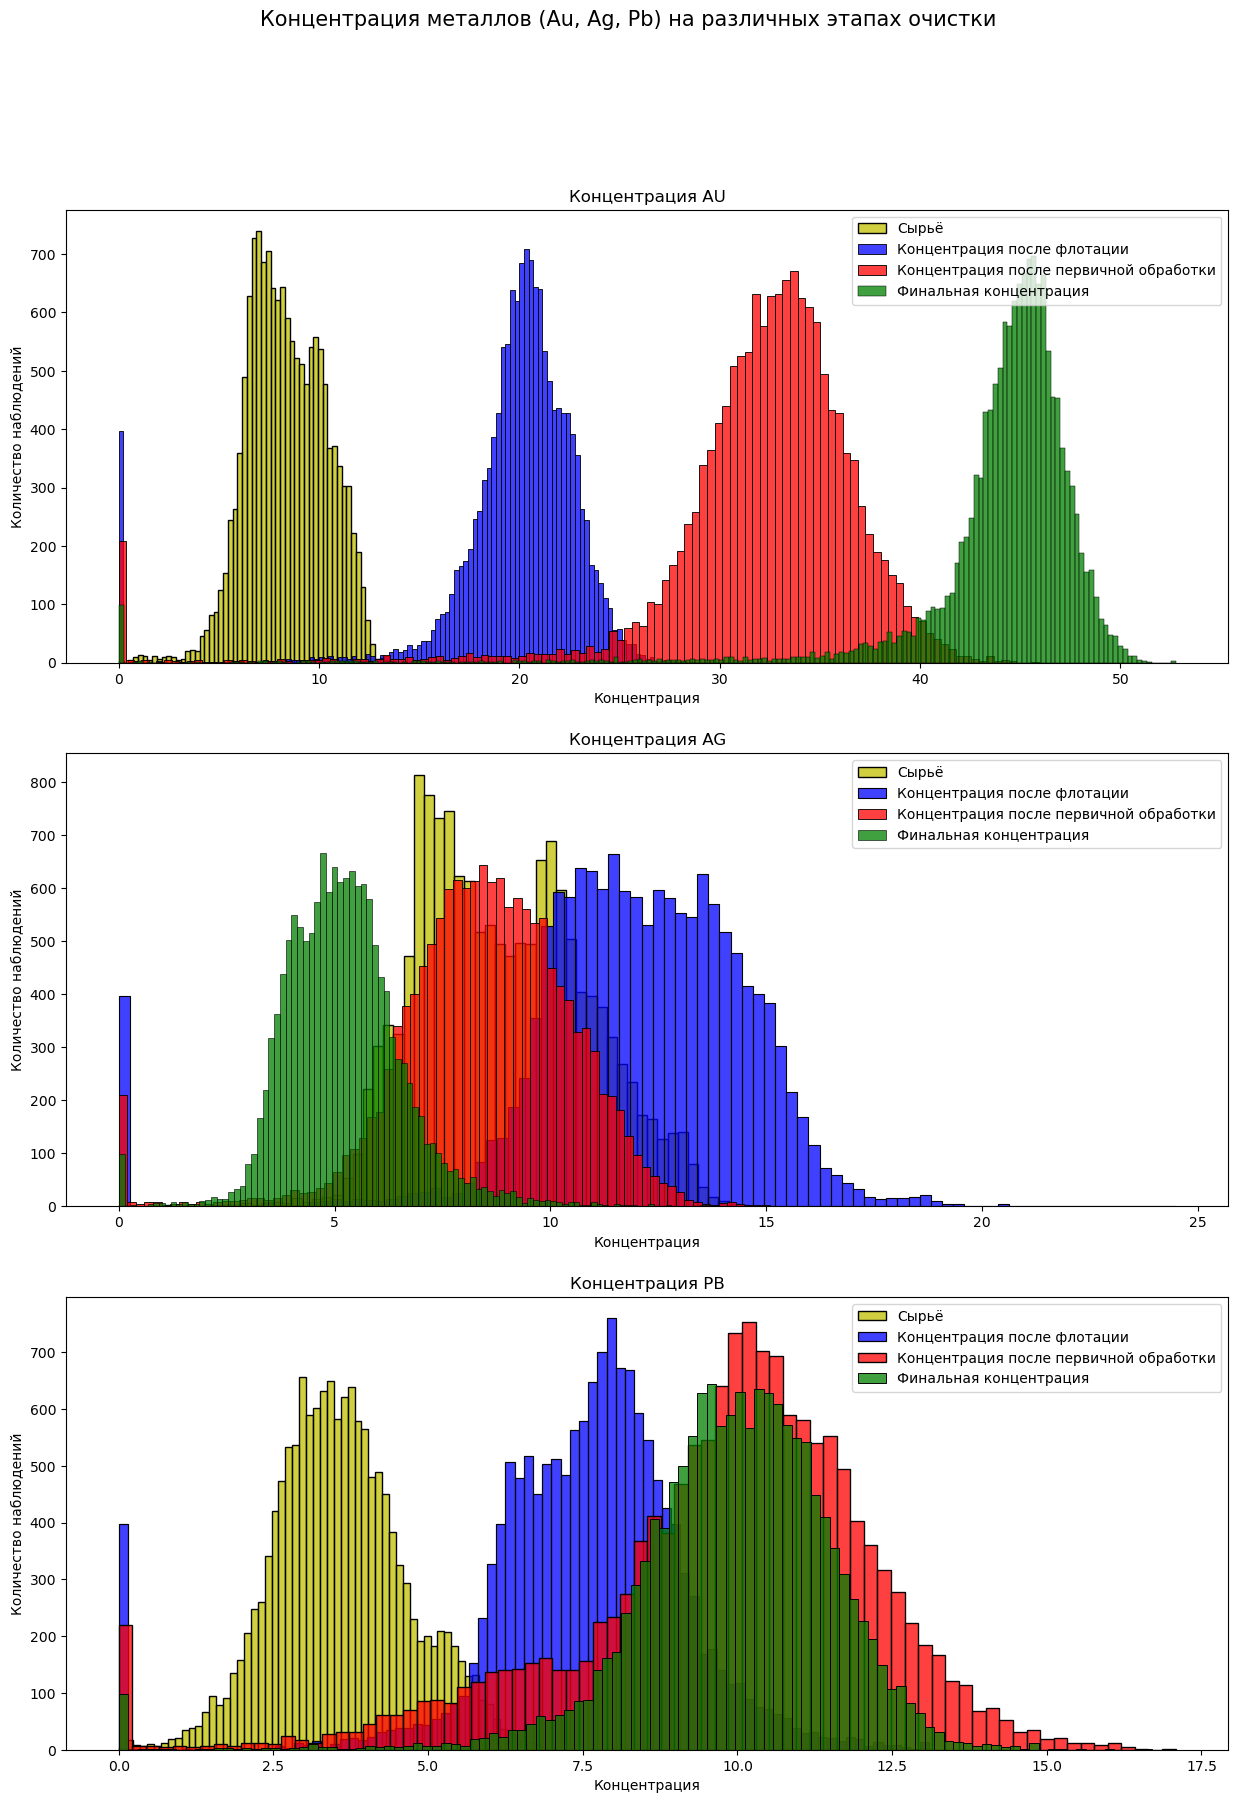

In [21]:
plt.figure(figsize=(15,20))
position = 1
plt.suptitle('Концентрация металлов (Au, Ag, Pb) на различных этапах очистки', fontsize=15)
for i in ['au', 'ag', 'pb']:
    plt.subplot(3, 1, position)
    plt.title(f'Концентрация {i.upper()}')
    sns.histplot(data_train[f'rougher.input.feed_{i}'], color='y', label='Сырьё')
    sns.histplot(data_train[f'rougher.output.concentrate_{i}'], color='b', label='Концентрация после флотации')
    sns.histplot(data_train[f'primary_cleaner.output.concentrate_{i}'], color='r', label='Концентрация после первичной обработки')
    sns.histplot(data_train[f'final.output.concentrate_{i}'], color='g', label='Финальная концентрация')
    plt.xlabel('Концентрация')
    plt.ylabel('Количество наблюдений')
    plt.legend()
    position += 1
plt.show()    

Присутствуют выбросы данных при концентрации близкой к 0. Необходимо от них избавиться, так как они могут повлиять на модель.

In [22]:
data_train = data_train.loc[data_train['rougher.input.feed_au'] > 0]
data_train = data_train.loc[data_train['rougher.output.concentrate_au'] > 0]
data_train = data_train.loc[data_train['primary_cleaner.output.concentrate_au'] > 0.01]
data_train = data_train.loc[data_train['final.output.concentrate_au'] > 0]


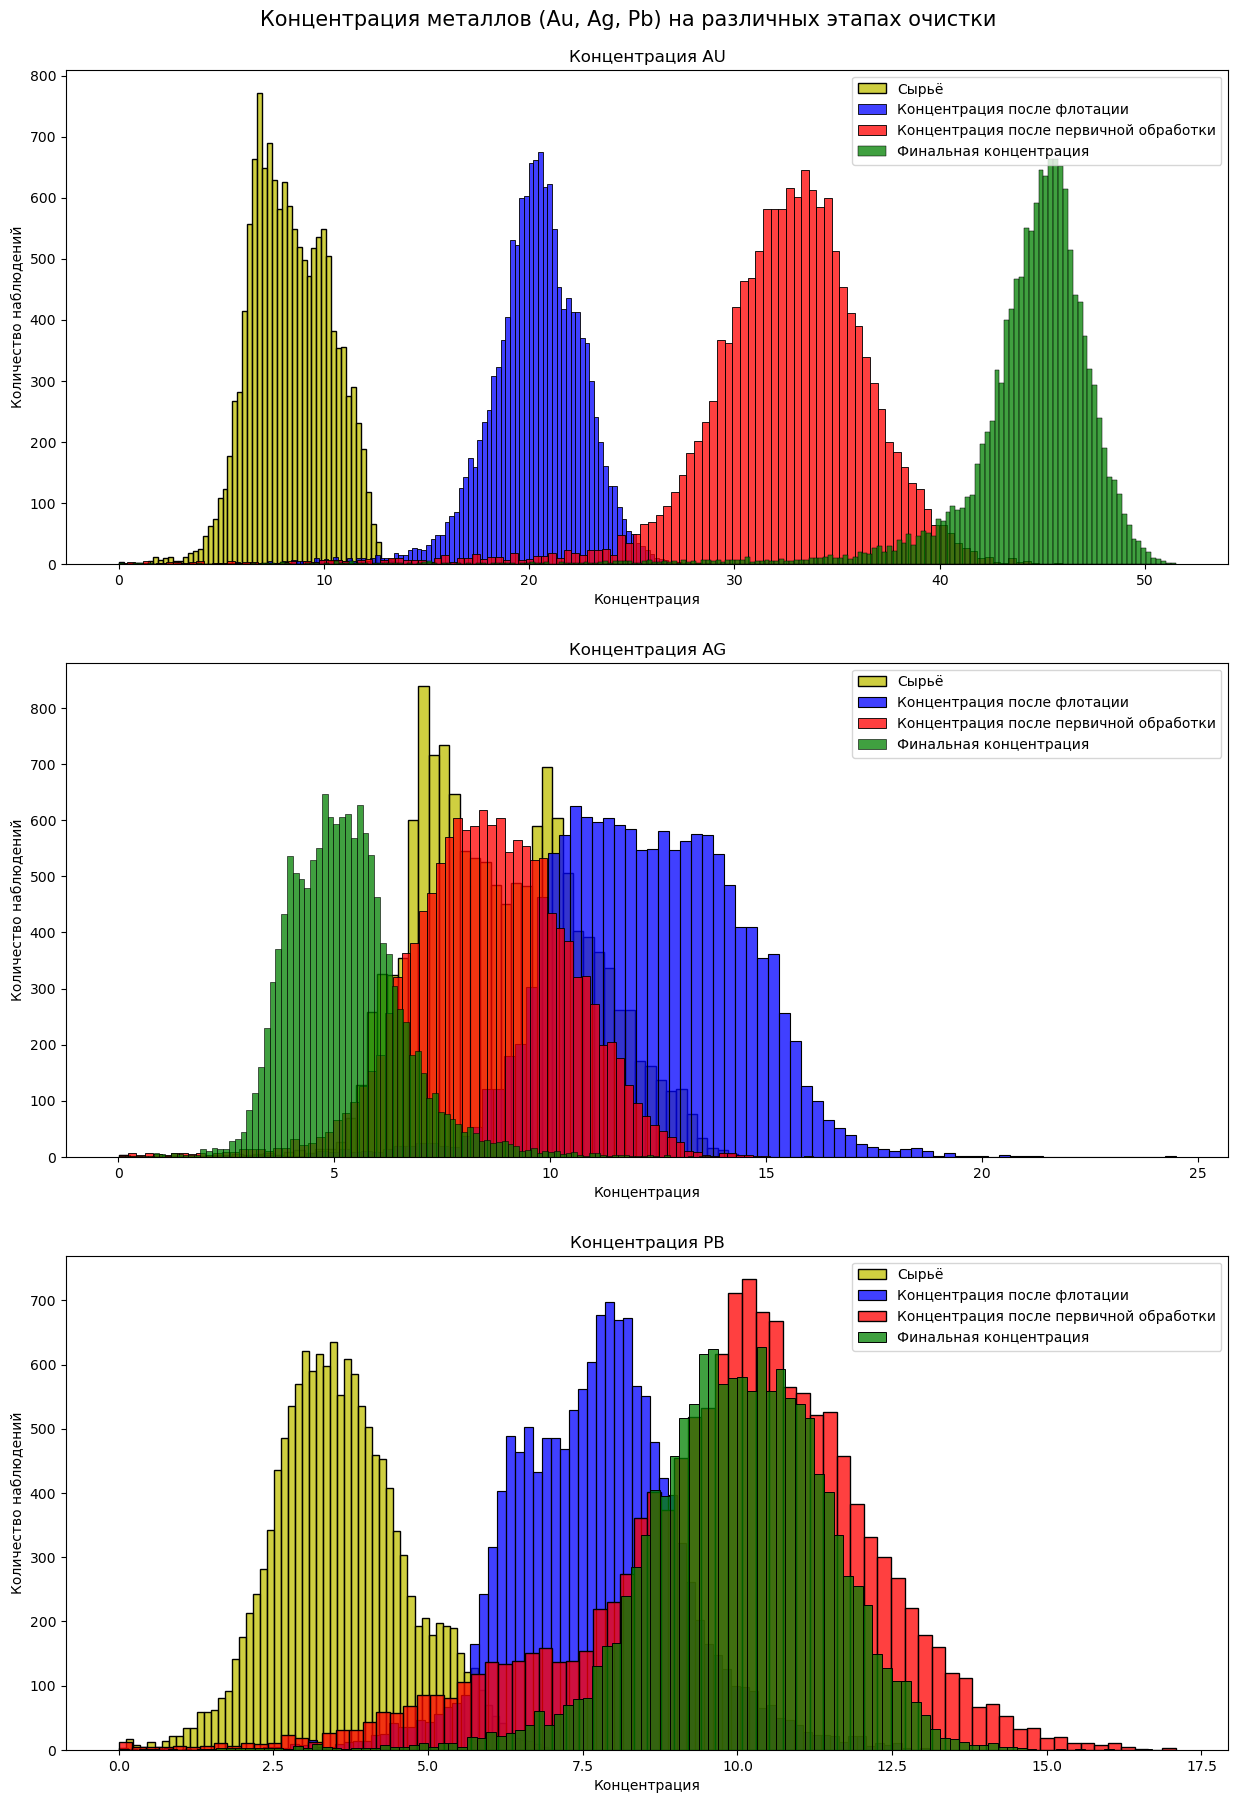

In [23]:
plt.figure(figsize=(15,20))
position = 1
plt.subplots_adjust(top=0.95)
plt.suptitle('Концентрация металлов (Au, Ag, Pb) на различных этапах очистки', fontsize=15)
for i in ['au', 'ag', 'pb']:
    plt.subplot(3, 1, position)
    plt.title(f'Концентрация {i.upper()}')
    sns.histplot(data_train[f'rougher.input.feed_{i}'], color='y', label='Сырьё')
    sns.histplot(data_train[f'rougher.output.concentrate_{i}'], color='b', label='Концентрация после флотации')
    sns.histplot(data_train[f'primary_cleaner.output.concentrate_{i}'], color='r', label='Концентрация после первичной обработки')
    sns.histplot(data_train[f'final.output.concentrate_{i}'], color='g', label='Финальная концентрация')
    plt.xlabel('Концентрация')
    plt.ylabel('Количество наблюдений')
    plt.legend()
    position += 1
plt.show()   

<b>Вывод </b>
<br> Коцентрация золота (AU) постепенно увеличивается, посл каждой обработки
<br>
<br> Концентрация серебра (AG) увеливается после флотации, однако на последующихэтапах концентрация снижается
<br>
<br> Концентрация свинцв (PB) увеличивается после флотации и после первичной обработки. Далее концентрация находится на одном уровне

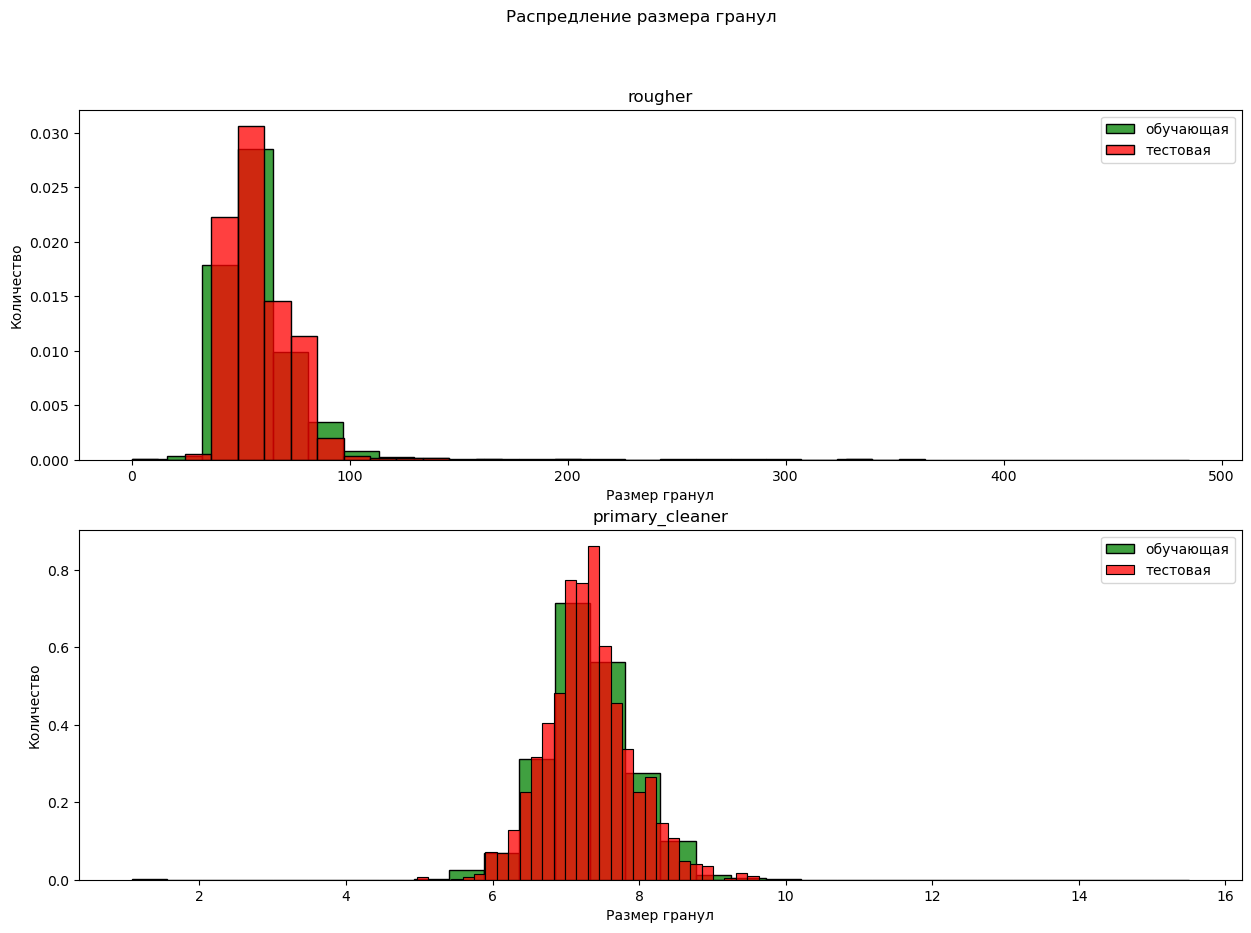

In [24]:
position = 0
plt.figure(figsize=(15,10))
plt.suptitle('Распредление размера гранул')
for i in ['rougher', 'primary_cleaner']:
    position += 1
    plt.subplot(2,1,position)
    plt.title(i)
    sns.histplot(data_train[f'{i}.input.feed_size'], color='g', label='обучающая',bins=30, stat='density')
    sns.histplot(data_test[f'{i}.input.feed_size'], color ='r', label='тестовая',bins=30, stat='density')
    plt.xlabel('Размер гранул')
    plt.ylabel('Количество')
    plt.legend()
plt.show()    

<b>Вывод</b> Для обучающей и тестовой выборки наблюдаются одинаковые распределения. Распределения имеют один вид  и диапозон занчений.

<b>2.2 Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.</b> 

In [25]:
sum_rougher_input = 0
sum_rougher_output = 0
sum_final_output = 0
for i in ['au', 'ag', 'pb', 'sol']:
    sum_rougher_input += data_train[f'rougher.input.feed_{i}']
    sum_rougher_output += data_train[f'rougher.output.concentrate_{i}']
    sum_final_output += data_train[f'final.output.concentrate_{i}']

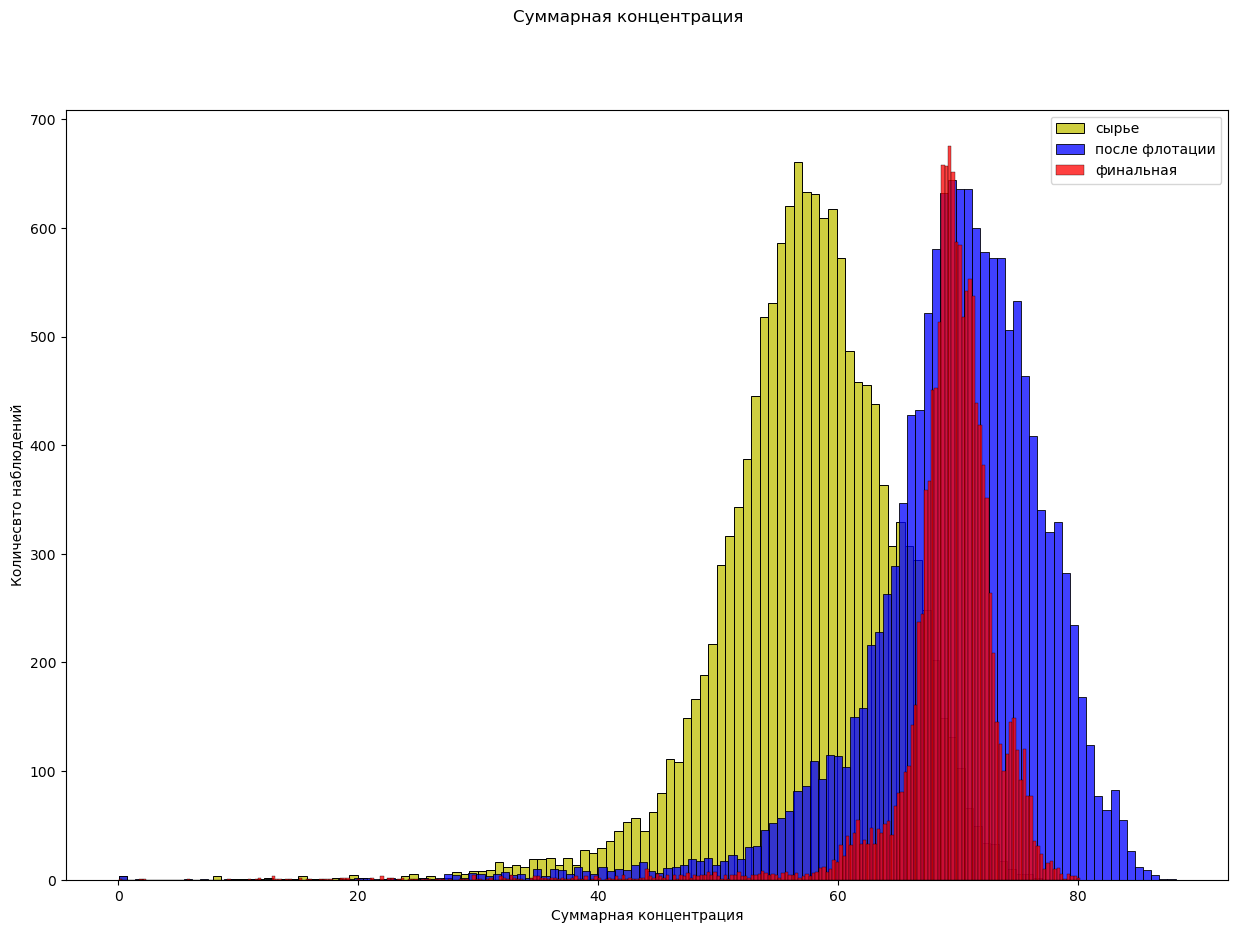

In [26]:

plt.figure(figsize=(15,10))
plt.suptitle('Суммарная концентрация')
sns.histplot(sum_rougher_input,label='сырье', color='y')
sns.histplot(sum_rougher_output, label='после флотации', color='b')
sns.histplot(sum_final_output, label='финальная', color='r')
plt.xlabel('Суммарная концентрация')
plt.ylabel('Количесвто наблюдений')
plt.legend()
plt.show()




<b>Вывод</b>
Концентрации после флотации увеличивается по отношению к сырью. При дальнейшей обработке, диапозон уменьшается.

## Модель

Необходимо удалить из обучающей выборки признаки, которые отсутствуют в тестовой выборке
    

In [27]:
none_columns = set(none_columns) - set(['rougher.output.recovery','final.output.recovery']) 

In [28]:
data_train = data_train.drop(columns=list(none_columns))
data_train = data_train.drop(columns='date')

In [29]:
def smape_one(target, predict):
    smape = (1/len(target))*np.sum((np.abs(target - predict))/( (np.abs(target)+np.abs(predict))/2))*100
    return smape

In [30]:
smape_scorer = make_scorer(smape_one, greater_is_better = False)

Функция для расчёта финального SMAPE

In [31]:
def final_smape(rougher, final):
    final = 0.25*rougher + 0.75*final
    return final

Подготовка данных

In [32]:
features_train = data_train.drop(columns=['rougher.output.recovery','final.output.recovery'])
target_train_rougher = data_train['rougher.output.recovery']
target_train_final = data_train['final.output.recovery']

<b>Обучение моделей</b>


Линейная регрессия

In [33]:
RANDOM_STATE = 12345
final_smape_table = []

In [34]:
model_lr = LinearRegression()
smape_lr_rougher = pd.Series(cross_val_score(model_lr, features_train, target_train_rougher, cv=5, scoring=smape_scorer))
smape_lr_final = pd.Series(cross_val_score(model_lr, features_train, target_train_final, cv=5, scoring=smape_scorer))
final_smape_table.append(final_smape(smape_lr_rougher.mean(), smape_lr_final.mean())*(-1))
final_smape_table

[8.870431218613154]

Решающее дерево

In [35]:
best_result_rougher = 100
best_max_depth_rougher = 0
best_result_final = 100
best_max_depth_rougher = 0
for i in range(2,10):
    model_dt = DecisionTreeRegressor(max_depth=i, random_state=RANDOM_STATE)
    smape_dt_rougher = pd.Series(cross_val_score(model_dt, features_train, target_train_rougher, cv=5, scoring=smape_scorer))
    model_dt = DecisionTreeRegressor(max_depth=i, random_state=RANDOM_STATE)
    smape_dt_final = pd.Series(cross_val_score(model_dt, features_train, target_train_final, cv=5, scoring=smape_scorer))
    result_rougher = smape_dt_rougher.mean()*(-1)
    result_final = smape_dt_final.mean()*(-1)
    if result_rougher < best_result_rougher:
        best_result_rougher = result_rougher
        best_max_depth_rougher = i
    if result_final < best_result_final:
        best_result_final = result_final
        best_max_depth_final = i    
final_smape_table.append(final_smape(best_result_rougher, best_result_final))        
display('Лучший результат smape rougher', best_result_rougher, 'max_depth_rougher=', best_max_depth_rougher)
display('Лучший результат smape final', best_result_final, 'max_depth_final=', best_max_depth_final)      

'Лучший результат smape rougher'

6.670381426373919

'max_depth_rougher='

5

'Лучший результат smape final'

9.21803626854853

'max_depth_final='

2

Случайный лес

In [36]:
best_result_rougher = 100
best_max_depth_rougher = 0
best_result_final = 100
best_max_depth_rougher = 0
best_estimators_rougher = 0
best_estimators_final = 0
for i in range(2,50,20):
    for j in range(2,8,2):
        model_rf = RandomForestRegressor(max_depth=j, n_estimators = i, random_state=RANDOM_STATE)
        smape_rf_rougher = pd.Series(cross_val_score(model_rf, features_train, target_train_rougher, cv=5, scoring=smape_scorer))
        model_rf = RandomForestRegressor(max_depth=j, n_estimators = i, random_state=RANDOM_STATE)
        smape_rf_final = pd.Series(cross_val_score(model_rf, features_train, target_train_final, cv=5, scoring=smape_scorer))
        result_rougher = smape_rf_rougher.mean()*(-1)
        result_final = smape_rf_final.mean()*(-1)
        if result_rougher < best_result_rougher:
            best_result_rougher = result_rougher
            best_max_depth_rougher = j
            best_estimators_rougher = i
        if result_final < best_result_final:
            best_result_final = result_final
            best_max_depth_final = j
            best_estimators_final = i    
final_smape_table.append(final_smape(best_result_rougher, best_result_final))        
display('Лучший результат smape rougher', best_result_rougher, 'max_depth_rougher=', best_max_depth_rougher, 'n_estimators_rougher', best_estimators_rougher)
display('Лучший результат smape final', best_result_final, 'max_depth_final=', best_max_depth_final, 'n_estimators_final', best_estimators_final) 

'Лучший результат smape rougher'

6.545165859421244

'max_depth_rougher='

6

'n_estimators_rougher'

42

'Лучший результат smape final'

8.786925268180795

'max_depth_final='

2

'n_estimators_final'

42

In [37]:
pd.DataFrame(final_smape_table, index=['LR', 'DT', 'RF'])

,0
LR,8.870431
DT,8.581123
RF,8.226485


In [38]:
data_test = data_test.drop(columns='date')
model_rf_final_rougher = RandomForestRegressor(max_depth=6, n_estimators = 42, random_state=RANDOM_STATE)
model_rf_final_rougher.fit(features_train, target_train_rougher)
model_rf_final_final = RandomForestRegressor(max_depth=4, n_estimators = 42, random_state=RANDOM_STATE)
model_rf_final_final.fit(features_train, target_train_final)
features_test = data_test.drop(columns=['rougher.output.recovery','final.output.recovery'])
target_test_rougher = data_test['rougher.output.recovery']
target_test_final = data_test['final.output.recovery']                                   
test_smape = final_smape(smape_one(target_test_rougher, model_rf_final_rougher.predict(features_test)),
                smape_one(target_test_final, model_rf_final_final.predict(features_test)))
test_smape              

6.654958830568457

In [39]:
dummy_rougher = DummyRegressor(strategy="mean")
dummy_final = DummyRegressor(strategy="mean")

dummy_rougher.fit(features_train, target_train_rougher)
dummy_final.fit(features_train, target_train_final)

dummy_predicted_rougher = dummy_rougher.predict(features_test)
dummy_predicted_final = dummy_final.predict(features_test)

smape_const_rougher = smape_one(target_test_rougher, dummy_predicted_rougher)
smape_const_final = smape_one(target_test_final, dummy_predicted_final)

final_smape_const = final_smape(smape_const_rougher, smape_const_final)
final_smape_const

8.467355033628762

<b>Выводы</b>
<br>   На первом этапе исследования были выявлены пропуски в данных. Пропуски данных были заменены соседними по времени значениями. Так же был изменён тип данных в столбце 'date'
<br>   На втором этапе проанализировано изменение концентрации по этапам очистки. Концентрация золота и свинца увеличивается по этапам обработки. Концентрация серебра уменьшается. Суммарная концентрация на начальном этапе увеличивается, на послоедующих этапах заметно снижение концентрации 
<br>   На этапе обучения модели, из обучающей выборки были удалены признаки, которые отсутствуют в тестовой выборки, для избежания утечки целевого признака.
<br> - Модель с лучшими результатами прогноза является  - RandomForestRegressor(SMAPE=8.27)
<br> - Результат тестовой выборки ниже обучающей - RandomForestRegressor(SMAPE=9.82)
<br> - Показатель модели меньше показателя константной, что означает хорошее качество полученной модели.

